In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm, trange

In [2]:
from functions.ellipsoid import Ellipsoid
from functions.rosenbrock import Rosenbrock
from functions.log_ellipsoid import LogEllipsoid
from functions.attractive_sector import AttractiveSector
from functions.sum_of_different_powers import SumOfDifferentPowers

In [3]:
from optimizers.trust_region.trust_region import TrustRegion

In [4]:
def plot_contour(f, xs=10, ys=10, lines=50):
    n = 500
    x, y = np.linspace(-xs, xs, n), np.linspace(-ys, ys, n)
    X, Y = np.meshgrid(x, y)
    Z = np.zeros((n, n))
    for i in range(0, n):
        for j in range(0, n):
            Z[i][j] = f([X[i][j], Y[i][j]])
    plt.contour(X,Y,Z, lines)

In [5]:
def print_state(xk, F):
    print("-----")
    print("x: ", xk)
    print("f(x): ", F.f(xk))
    print("f_grad(x): ", F.gradient(xk))
    print("f_hess(x):", F.hessian(xk))

def print_meta_state(meta, m, latest_point):
    print("delta for next iter", meta['delta'])
    print("rho", meta['rho'])
    print("p", meta['direction'])
    print("p_norm", np.linalg.norm(meta['direction'][0]))
    print("m", m(meta['direction'][0], latest_point))
def plot_contour_from_function(minimize, F, xs=10, ys=10, g_tol=0.1, debug=False, start_point=[8,8], lambda_init=1, delta_init=100, max_iterations=1000):
    xk_at_i = [start_point]
    if debug:
        print_state(start_point, F)
    def m(p, x):
        return F.f(x) + np.array(F.gradient(x)).T @ p + 0.5 * p.T @ F.hessian(x) @ p
    def c(xk):
        if debug:
            print_state(xk, F)
        xk_at_i.append(xk)
        if np.linalg.norm(F.gradient(xk)) < g_tol:
            return True
        return False
    def meta_f(meta):
        if debug:
            print_meta_state(meta, m, xk_at_i[-1])
    plot_contour(F.f, xs=xs, ys=ys)
    print(minimize(F.f, start_point, F.gradient, hes=F.hessian, callback=c, lambda_init=lambda_init, delta_init=delta_init, meta_callback=meta_f, max_iterations=max_iterations))
    #print([np.linalg.norm(F.gradient(xk)) for xk in xk_at_i])
    #print(xk_at_i)
    plt.plot([xk[0] for xk in xk_at_i[:-1]], [xk[1] for xk in xk_at_i[:-1]], c='orange')
    plt.scatter([xk[0] for xk in xk_at_i[:-1]], [xk[1] for xk in xk_at_i[:-1]], c='orange')

In [6]:
def plot_delta_from_function(minimize, F, g_tol=0.5, debug=False, start_point=[8,8], delta_init=10, lambda_init=1):
    delta_at_i = []
    p_at_i = []
    rho_at_i = []
    x_at_i = []
    if debug:
        print_state(start_point, F)
    def c(xk):
        if debug:
            print_state(xk, F)
        x_at_i.append(xk)
        if np.linalg.norm(F.gradient(xk)) < g_tol:
            return True
        return False
    def m(meta):
        delta_at_i.append(meta['delta'])
        p_at_i.append(meta['direction'])
        rho_at_i.append(meta['rho'])
    minimize(F.f, start_point, F.gradient, hes=F.hessian, callback=c, meta_callback=m, delta_init=delta_init, lambda_init=lambda_init)
    plt.xlabel('iterations')
    plt.ylabel('trust region radius')
    plt.plot(delta_at_i)
    return delta_at_i, p_at_i, rho_at_i, x_at_i
    #print([np.linalg.norm(F.gradient(xk)) for xk in xk_at_i])
    #print(xk_at_i)
    #plt.plot([xk[0] for xk in xk_at_i[:-1]], [xk[1] for xk in xk_at_i[:-1]], c='orange')
    #plt.scatter([xk[0] for xk in xk_at_i[:-1]], [xk[1] for xk in xk_at_i[:-1]], c='orange')

[ -0.03042552 -30.31035778] 350.8865164590701
top part -433751.57847069827
bottom part 484047.4935277959
top part -433751.57847069827
bottom part 484047.4935277959
[ -0.03041998 -30.3048645 ] 350.9715966470428
top part -433506.4947315596
bottom part 483959.9339645301
top part -433506.4947315596
bottom part 483959.9339645301
[ -0.0304186  -30.30349127] 350.99287053977616
top part -433445.23695517797
bottom part 483938.04539654235
top part -433445.23695517797
bottom part 483938.04539654235
[ -0.03041825 -30.30314796] 350.9981892533473
top part -433429.9233334278
bottom part 483932.5733372296
top part -433429.9233334278
bottom part 483932.5733372296
[ -0.03041817 -30.30306214] 350.9995189467646
top part -433426.0949793866
bottom part 483931.20532756957
top part -433426.0949793866
bottom part 483931.20532756957
[ -0.03041815 -30.30304068] 350.99985137105796
top part -433425.1378940886
bottom part 483930.86332547746
top part -433425.1378940886
bottom part 483930.86332547746
[ -0.03041814 -3

[ -0.03041814 -30.30303353] 350.9999621792394
top part -433424.8188659408
bottom part 483930.74932480865
top part -433424.8188659408
bottom part 483930.74932480865
[ -0.03041814 -30.30303353] 350.9999621792394
top part -433424.8188659408
bottom part 483930.74932480865
top part -433424.8188659408
bottom part 483930.74932480865
[ -0.03041814 -30.30303353] 350.9999621792394
top part -433424.8188659408
bottom part 483930.74932480865
top part -433424.8188659408
bottom part 483930.74932480865
[ -0.03041814 -30.30303353] 350.9999621792394
top part -433424.8188659408
bottom part 483930.74932480865
top part -433424.8188659408
bottom part 483930.74932480865
[ -0.03041814 -30.30303353] 350.9999621792394
top part -433424.8188659408
bottom part 483930.74932480865
top part -433424.8188659408
bottom part 483930.74932480865
[ -0.03041814 -30.30303353] 350.9999621792394
top part -433424.8188659408
bottom part 483930.74932480865
top part -433424.8188659408
bottom part 483930.74932480865
[ -0.03041814 -3

[ -0.03041814 -30.30303353] 350.9999621792394
top part -433424.8188659408
bottom part 483930.74932480865
top part -433424.8188659408
bottom part 483930.74932480865
[ -0.03041814 -30.30303353] 350.9999621792394
top part -433424.8188659408
bottom part 483930.74932480865
top part -433424.8188659408
bottom part 483930.74932480865
[ -0.03041814 -30.30303353] 350.9999621792394
top part -433424.8188659408
bottom part 483930.74932480865
top part -433424.8188659408
bottom part 483930.74932480865
[ -0.03041814 -30.30303353] 350.9999621792394
top part -433424.8188659408
bottom part 483930.74932480865
top part -433424.8188659408
bottom part 483930.74932480865
[ -0.03041814 -30.30303353] 350.9999621792394
top part -433424.8188659408
bottom part 483930.74932480865
top part -433424.8188659408
bottom part 483930.74932480865
[ -0.03041814 -30.30303353] 350.9999621792394
top part -433424.8188659408
bottom part 483930.74932480865
top part -433424.8188659408
bottom part 483930.74932480865
[ -0.03041814 -3

[ -0.03041814 -30.30303353] 350.9999621792394
top part -433424.8188659408
bottom part 483930.74932480865
top part -433424.8188659408
bottom part 483930.74932480865
[ -0.03041814 -30.30303353] 350.9999621792394
top part -433424.8188659408
bottom part 483930.74932480865
top part -433424.8188659408
bottom part 483930.74932480865
[ -0.03041814 -30.30303353] 350.9999621792394
top part -433424.8188659408
bottom part 483930.74932480865
top part -433424.8188659408
bottom part 483930.74932480865
[ -0.03041814 -30.30303353] 350.9999621792394
top part -433424.8188659408
bottom part 483930.74932480865
top part -433424.8188659408
bottom part 483930.74932480865
[ -0.03041814 -30.30303353] 350.9999621792394
top part -433424.8188659408
bottom part 483930.74932480865
top part -433424.8188659408
bottom part 483930.74932480865
[ -0.03041814 -30.30303353] 350.9999621792394
top part -433424.8188659408
bottom part 483930.74932480865
top part -433424.8188659408
bottom part 483930.74932480865
[ -0.03041814 -3

[ -0.03041814 -30.30303353] 350.9999621792394
top part -433424.8188659408
bottom part 483930.74932480865
top part -433424.8188659408
bottom part 483930.74932480865
[ -0.03041814 -30.30303353] 350.9999621792394
top part -433424.8188659408
bottom part 483930.74932480865
top part -433424.8188659408
bottom part 483930.74932480865
[ -0.03041814 -30.30303353] 350.9999621792394
top part -433424.8188659408
bottom part 483930.74932480865
top part -433424.8188659408
bottom part 483930.74932480865
[ -0.03041814 -30.30303353] 350.9999621792394
top part -433424.8188659408
bottom part 483930.74932480865
top part -433424.8188659408
bottom part 483930.74932480865
[ -0.03041814 -30.30303353] 350.9999621792394
top part -433424.8188659408
bottom part 483930.74932480865
top part -433424.8188659408
bottom part 483930.74932480865
[ -0.03041814 -30.30303353] 350.9999621792394
top part -433424.8188659408
bottom part 483930.74932480865
top part -433424.8188659408
bottom part 483930.74932480865
[ -0.03041814 -3

[ -0.03041814 -30.30303353] 350.9999621792394
top part -433424.8188659408
bottom part 483930.74932480865
top part -433424.8188659408
bottom part 483930.74932480865
[ -0.03041814 -30.30303353] 350.9999621792394
top part -433424.8188659408
bottom part 483930.74932480865
top part -433424.8188659408
bottom part 483930.74932480865
[ -0.03041814 -30.30303353] 350.9999621792394
top part -433424.8188659408
bottom part 483930.74932480865
top part -433424.8188659408
bottom part 483930.74932480865
[ -0.03041814 -30.30303353] 350.9999621792394
top part -433424.8188659408
bottom part 483930.74932480865
top part -433424.8188659408
bottom part 483930.74932480865
[ -0.03041814 -30.30303353] 350.9999621792394
top part -433424.8188659408
bottom part 483930.74932480865
top part -433424.8188659408
bottom part 483930.74932480865
[ -0.03041814 -30.30303353] 350.9999621792394
top part -433424.8188659408
bottom part 483930.74932480865
top part -433424.8188659408
bottom part 483930.74932480865
[ -0.03041814 -3

[ -0.03041814 -30.30303353] 350.9999621792394
top part -433424.8188659408
bottom part 483930.74932480865
top part -433424.8188659408
bottom part 483930.74932480865
[ -0.03041814 -30.30303353] 350.9999621792394
top part -433424.8188659408
bottom part 483930.74932480865
top part -433424.8188659408
bottom part 483930.74932480865
[ -0.03041814 -30.30303353] 350.9999621792394
top part -433424.8188659408
bottom part 483930.74932480865
top part -433424.8188659408
bottom part 483930.74932480865
[ -0.03041814 -30.30303353] 350.9999621792394
top part -433424.8188659408
bottom part 483930.74932480865
top part -433424.8188659408
bottom part 483930.74932480865
[ -0.03041814 -30.30303353] 350.9999621792394
top part -433424.8188659408
bottom part 483930.74932480865
top part -433424.8188659408
bottom part 483930.74932480865
[ -0.03041814 -30.30303353] 350.9999621792394
top part -433424.8188659408
bottom part 483930.74932480865
top part -433424.8188659408
bottom part 483930.74932480865
[ -0.03041814 -3

[ -0.03041814 -30.30303353] 350.9999621792394
top part -433424.8188659408
bottom part 483930.74932480865
top part -433424.8188659408
bottom part 483930.74932480865
[ -0.03041814 -30.30303353] 350.9999621792394
top part -433424.8188659408
bottom part 483930.74932480865
top part -433424.8188659408
bottom part 483930.74932480865
[ -0.03041814 -30.30303353] 350.9999621792394
top part -433424.8188659408
bottom part 483930.74932480865
top part -433424.8188659408
bottom part 483930.74932480865
[ -0.03041814 -30.30303353] 350.9999621792394
top part -433424.8188659408
bottom part 483930.74932480865
top part -433424.8188659408
bottom part 483930.74932480865
[ -0.03041814 -30.30303353] 350.9999621792394
top part -433424.8188659408
bottom part 483930.74932480865
top part -433424.8188659408
bottom part 483930.74932480865
[ -0.03041814 -30.30303353] 350.9999621792394
top part -433424.8188659408
bottom part 483930.74932480865
top part -433424.8188659408
bottom part 483930.74932480865
[ -0.03041814 -3

[ -0.03041814 -30.30303353] 350.9999621792394
top part -433424.8188659408
bottom part 483930.74932480865
top part -433424.8188659408
bottom part 483930.74932480865
[ -0.03041814 -30.30303353] 350.9999621792394
top part -433424.8188659408
bottom part 483930.74932480865
top part -433424.8188659408
bottom part 483930.74932480865
[ -0.03041814 -30.30303353] 350.9999621792394
top part -433424.8188659408
bottom part 483930.74932480865
top part -433424.8188659408
bottom part 483930.74932480865
[ -0.03041814 -30.30303353] 350.9999621792394
top part -433424.8188659408
bottom part 483930.74932480865
top part -433424.8188659408
bottom part 483930.74932480865
[ -0.03041814 -30.30303353] 350.9999621792394
top part -433424.8188659408
bottom part 483930.74932480865
top part -433424.8188659408
bottom part 483930.74932480865
[ -0.03041814 -30.30303353] 350.9999621792394
top part -433424.8188659408
bottom part 483930.74932480865
top part -433424.8188659408
bottom part 483930.74932480865
[ -0.03041814 -3

[ -0.03041814 -30.30303353] 350.9999621792394
top part -433424.8188659408
bottom part 483930.74932480865
top part -433424.8188659408
bottom part 483930.74932480865
[ -0.03041814 -30.30303353] 350.9999621792394
top part -433424.8188659408
bottom part 483930.74932480865
top part -433424.8188659408
bottom part 483930.74932480865
[ -0.03041814 -30.30303353] 350.9999621792394
top part -433424.8188659408
bottom part 483930.74932480865
top part -433424.8188659408
bottom part 483930.74932480865
[ -0.03041814 -30.30303353] 350.9999621792394
top part -433424.8188659408
bottom part 483930.74932480865
top part -433424.8188659408
bottom part 483930.74932480865
[ -0.03041814 -30.30303353] 350.9999621792394
top part -433424.8188659408
bottom part 483930.74932480865
top part -433424.8188659408
bottom part 483930.74932480865
[ -0.03041814 -30.30303353] 350.9999621792394
top part -433424.8188659408
bottom part 483930.74932480865
top part -433424.8188659408
bottom part 483930.74932480865
[ -0.03041814 -3

[ -0.03041814 -30.30303353] 350.9999621792394
top part -433424.8188659408
bottom part 483930.74932480865
top part -433424.8188659408
bottom part 483930.74932480865
[ -0.03041814 -30.30303353] 350.9999621792394
top part -433424.8188659408
bottom part 483930.74932480865
top part -433424.8188659408
bottom part 483930.74932480865
[ -0.03041814 -30.30303353] 350.9999621792394
top part -433424.8188659408
bottom part 483930.74932480865
top part -433424.8188659408
bottom part 483930.74932480865
[ -0.03041814 -30.30303353] 350.9999621792394
top part -433424.8188659408
bottom part 483930.74932480865
top part -433424.8188659408
bottom part 483930.74932480865
[ -0.03041814 -30.30303353] 350.9999621792394
top part -433424.8188659408
bottom part 483930.74932480865
top part -433424.8188659408
bottom part 483930.74932480865
[ -0.03041814 -30.30303353] 350.9999621792394
top part -433424.8188659408
bottom part 483930.74932480865
top part -433424.8188659408
bottom part 483930.74932480865
[ -0.03041814 -3

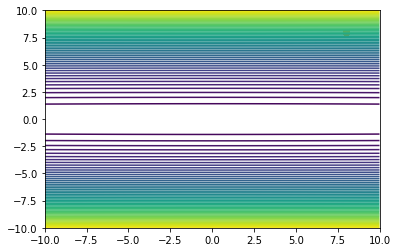

In [7]:
plot_contour_from_function(TrustRegion.minimize, Ellipsoid, lambda_init=10, delta_init=100)

[  -0.90338835 -811.80780629] 12.139396962830714
-52.39641732700173
[  -0.90338809 -811.80759876] 12.139401429301763
-52.39640294765097
[  -0.90338803 -811.80754688] 12.139402545919808
-52.39639935281368
[  -0.90338801 -811.80753391] 12.139402825074344
-52.39639845410435
[  -0.90338801 -811.80753067] 12.139402894862977
-52.396398229427014
[  -0.90338801 -811.80752986] 12.139402912310132
-52.3963981732577
[  -0.90338801 -811.80752966] 12.139402916671928
-52.39639815921534
[  -0.90338801 -811.80752961] 12.13940291776237
-52.39639815570478
[  -0.90338801 -811.80752959] 12.139402918034985
-52.39639815482712
[  -0.90338801 -811.80752959] 12.139402918103137
-52.396398154607716
[  -0.90338801 -811.80752959] 12.139402918120176
-52.396398154552855
[  -0.90338801 -811.80752959] 12.139402918124434
-52.39639815453915
[  -0.90338801 -811.80752959] 12.139402918125501
-52.3963981545357
[  -0.90338801 -811.80752959] 12.139402918125771
-52.39639815453485
[  -0.90338801 -811.80752959] 12.139402918125835

[  -0.90338801 -811.80752959] 12.139402918125857
-52.39639815453455
[  -0.90338801 -811.80752959] 12.139402918125857
-52.39639815453455
[  -0.90338801 -811.80752959] 12.139402918125857
-52.39639815453455
[  -0.90338801 -811.80752959] 12.139402918125857
-52.39639815453455
[  -0.90338801 -811.80752959] 12.139402918125857
-52.39639815453455
[  -0.90338801 -811.80752959] 12.139402918125857
-52.39639815453455
[  -0.90338801 -811.80752959] 12.139402918125857
-52.39639815453455
[  -0.90338801 -811.80752959] 12.139402918125857
-52.39639815453455
[  -0.90338801 -811.80752959] 12.139402918125857
-52.39639815453455
[  -0.90338801 -811.80752959] 12.139402918125857
-52.39639815453455
[  -0.90338801 -811.80752959] 12.139402918125857
-52.39639815453455
[  -0.90338801 -811.80752959] 12.139402918125857
-52.39639815453455
[  -0.90338801 -811.80752959] 12.139402918125857
-52.39639815453455
[  -0.90338801 -811.80752959] 12.139402918125857
-52.39639815453455
[  -0.90338801 -811.80752959] 12.139402918125857

[  -0.90338801 -811.80752959] 12.139402918125857
-52.39639815453455
[  -0.90338801 -811.80752959] 12.139402918125857
-52.39639815453455
[  -0.90338801 -811.80752959] 12.139402918125857
-52.39639815453455
[  -0.90338801 -811.80752959] 12.139402918125857
-52.39639815453455
[  -0.90338801 -811.80752959] 12.139402918125857
-52.39639815453455
[  -0.90338801 -811.80752959] 12.139402918125857
-52.39639815453455
[  -0.90338801 -811.80752959] 12.139402918125857
-52.39639815453455
[  -0.90338801 -811.80752959] 12.139402918125857
-52.39639815453455
[  -0.90338801 -811.80752959] 12.139402918125857
-52.39639815453455
[  -0.90338801 -811.80752959] 12.139402918125857
-52.39639815453455
[  -0.90338801 -811.80752959] 12.139402918125857
-52.39639815453455
[  -0.90338801 -811.80752959] 12.139402918125857
-52.39639815453455
[  -0.90338801 -811.80752959] 12.139402918125857
-52.39639815453455
[  -0.90338801 -811.80752959] 12.139402918125857
-52.39639815453455
[  -0.90338801 -811.80752959] 12.139402918125857

-52.39639815453455
[  -0.90338801 -811.80752959] 12.139402918125857
-52.39639815453455
[  -0.90338801 -811.80752959] 12.139402918125857
-52.39639815453455
[  -0.90338801 -811.80752959] 12.139402918125857
-52.39639815453455
[  -0.90338801 -811.80752959] 12.139402918125857
-52.39639815453455
[  -0.90338801 -811.80752959] 12.139402918125857
-52.39639815453455
[  -0.90338801 -811.80752959] 12.139402918125857
-52.39639815453455
[  -0.90338801 -811.80752959] 12.139402918125857
-52.39639815453455
[  -0.90338801 -811.80752959] 12.139402918125857
-52.39639815453455
[  -0.90338801 -811.80752959] 12.139402918125857
-52.39639815453455
[  -0.90338801 -811.80752959] 12.139402918125857
-52.39639815453455
[  -0.90338801 -811.80752959] 12.139402918125857
-52.39639815453455
[  -0.90338801 -811.80752959] 12.139402918125857
-52.39639815453455
[  -0.90338801 -811.80752959] 12.139402918125857
-52.39639815453455
[  -0.90338801 -811.80752959] 12.139402918125857
-52.39639815453455
[  -0.90338801 -811.80752959]

[  -0.90338801 -811.80752959] 12.139402918125857
-52.39639815453455
[  -0.90338801 -811.80752959] 12.139402918125857
-52.39639815453455
[  -0.90338801 -811.80752959] 12.139402918125857
-52.39639815453455
[  -0.90338801 -811.80752959] 12.139402918125857
-52.39639815453455
[  -0.90338801 -811.80752959] 12.139402918125857
-52.39639815453455
[  -0.90338801 -811.80752959] 12.139402918125857
-52.39639815453455
[  -0.90338801 -811.80752959] 12.139402918125857
-52.39639815453455
[  -0.90338801 -811.80752959] 12.139402918125857
-52.39639815453455
[  -0.90338801 -811.80752959] 12.139402918125857
-52.39639815453455
[  -0.90338801 -811.80752959] 12.139402918125857
-52.39639815453455
[  -0.90338801 -811.80752959] 12.139402918125857
-52.39639815453455
[  -0.90338801 -811.80752959] 12.139402918125857
-52.39639815453455
[  -0.90338801 -811.80752959] 12.139402918125857
-52.39639815453455
[  -0.90338801 -811.80752959] 12.139402918125857
-52.39639815453455
[  -0.90338801 -811.80752959] 12.139402918125857

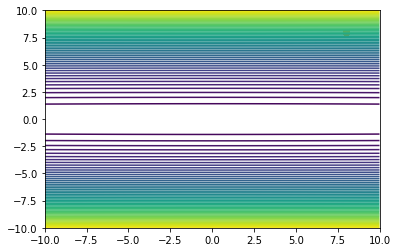

In [16]:
plot_contour_from_function(TrustRegion.minimize, Ellipsoid, lambda_init=1e-3)

[  -0.31514148 -303.20920349] 34.17920244297524
-18.29729953310525
[  -0.31514089 -303.20865452] 34.1792873936771
-18.2972639203585
[  -0.31514074 -303.20851728] 34.17930863139091
-18.297255017177623
[  -0.31514071 -303.20848297] 34.17931394082176
-18.29725279138277
[  -0.3151407 -303.2084744] 34.17931526817962
-18.297252234934074
[  -0.31514069 -303.20847225] 34.179315600019095
-18.297252095821907
[  -0.31514069 -303.20847172] 34.17931568297896
-18.297252061043864
[  -0.31514069 -303.20847158] 34.179315703718935
-18.29725205234935
[  -0.31514069 -303.20847155] 34.17931570890392
-18.29725205017572
[  -0.31514069 -303.20847154] 34.17931571020017
-18.297252049632313
[  -0.31514069 -303.20847154] 34.179315710524236
-18.297252049496457
[  -0.31514069 -303.20847154] 34.17931571060525
-18.297252049462493
[  -0.31514069 -303.20847154] 34.1793157106255
-18.29725204945401
[  -0.31514069 -303.20847154] 34.17931571063056
-18.297252049451888
[  -0.31514069 -303.20847154] 34.17931571063183
-18.2972

[  -0.31514069 -303.20847154] 34.17931571063227
-18.29725204945117
[  -0.31514069 -303.20847154] 34.17931571063227
-18.29725204945117
[  -0.31514069 -303.20847154] 34.17931571063227
-18.29725204945117
[  -0.31514069 -303.20847154] 34.17931571063227
-18.29725204945117
[  -0.31514069 -303.20847154] 34.17931571063227
-18.29725204945117
[  -0.31514069 -303.20847154] 34.17931571063227
-18.29725204945117
[  -0.31514069 -303.20847154] 34.17931571063227
-18.29725204945117
[  -0.31514069 -303.20847154] 34.17931571063227
-18.29725204945117
[  -0.31514069 -303.20847154] 34.17931571063227
-18.29725204945117
[  -0.31514069 -303.20847154] 34.17931571063227
-18.29725204945117
[  -0.31514069 -303.20847154] 34.17931571063227
-18.29725204945117
[  -0.31514069 -303.20847154] 34.17931571063227
-18.29725204945117
[  -0.31514069 -303.20847154] 34.17931571063227
-18.29725204945117
[  -0.31514069 -303.20847154] 34.17931571063227
-18.29725204945117
[  -0.31514069 -303.20847154] 34.17931571063227
-18.2972520494

-18.29725204945117
[  -0.31514069 -303.20847154] 34.17931571063227
-18.29725204945117
[  -0.31514069 -303.20847154] 34.17931571063227
-18.29725204945117
[  -0.31514069 -303.20847154] 34.17931571063227
-18.29725204945117
[  -0.31514069 -303.20847154] 34.17931571063227
-18.29725204945117
[  -0.31514069 -303.20847154] 34.17931571063227
-18.29725204945117
[  -0.31514069 -303.20847154] 34.17931571063227
-18.29725204945117
[  -0.31514069 -303.20847154] 34.17931571063227
-18.29725204945117
[  -0.31514069 -303.20847154] 34.17931571063227
-18.29725204945117
[  -0.31514069 -303.20847154] 34.17931571063227
-18.29725204945117
[  -0.31514069 -303.20847154] 34.17931571063227
-18.29725204945117
[  -0.31514069 -303.20847154] 34.17931571063227
-18.29725204945117
[  -0.31514069 -303.20847154] 34.17931571063227
-18.29725204945117
[  -0.31514069 -303.20847154] 34.17931571063227
-18.29725204945117
[  -0.31514069 -303.20847154] 34.17931571063227
-18.29725204945117
[  -0.31514069 -303.20847154] 34.1793157106

[  -0.31514069 -303.20847154] 34.17931571063227
-18.29725204945117
[  -0.31514069 -303.20847154] 34.17931571063227
-18.29725204945117
[  -0.31514069 -303.20847154] 34.17931571063227
-18.29725204945117
[  -0.31514069 -303.20847154] 34.17931571063227
-18.29725204945117
[  -0.31514069 -303.20847154] 34.17931571063227
-18.29725204945117
[  -0.31514069 -303.20847154] 34.17931571063227
-18.29725204945117
[  -0.31514069 -303.20847154] 34.17931571063227
-18.29725204945117
[  -0.31514069 -303.20847154] 34.17931571063227
-18.29725204945117
[  -0.31514069 -303.20847154] 34.17931571063227
-18.29725204945117
[  -0.31514069 -303.20847154] 34.17931571063227
-18.29725204945117
[  -0.31514069 -303.20847154] 34.17931571063227
-18.29725204945117
[  -0.31514069 -303.20847154] 34.17931571063227
-18.29725204945117
[  -0.31514069 -303.20847154] 34.17931571063227
-18.29725204945117
[  -0.31514069 -303.20847154] 34.17931571063227
-18.29725204945117
[  -0.31514069 -303.20847154] 34.17931571063227
-18.2972520494

[  -0.31514069 -303.20847154] 34.17931571063227
-18.29725204945117
[  -0.31514069 -303.20847154] 34.17931571063227
-18.29725204945117
[  -0.31514069 -303.20847154] 34.17931571063227
-18.29725204945117
[  -0.31514069 -303.20847154] 34.17931571063227
-18.29725204945117
[  -0.31514069 -303.20847154] 34.17931571063227
-18.29725204945117
[  -0.31514069 -303.20847154] 34.17931571063227
-18.29725204945117
[  -0.31514069 -303.20847154] 34.17931571063227
-18.29725204945117
[  -0.31514069 -303.20847154] 34.17931571063227
-18.29725204945117
[  -0.31514069 -303.20847154] 34.17931571063227
-18.29725204945117
[  -0.31514069 -303.20847154] 34.17931571063227
-18.29725204945117
[  -0.31514069 -303.20847154] 34.17931571063227
-18.29725204945117
[  -0.31514069 -303.20847154] 34.17931571063227
-18.29725204945117
[  -0.31514069 -303.20847154] 34.17931571063227
-18.29725204945117
[  -0.31514069 -303.20847154] 34.17931571063227
-18.29725204945117
[  -0.31514069 -303.20847154] 34.17931571063227
-18.2972520494

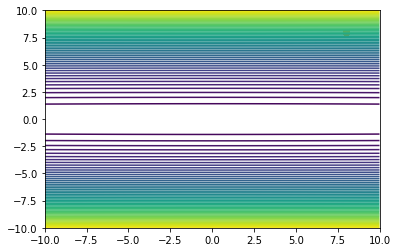

In [8]:
plot_contour_from_function(TrustRegion.minimize, Ellipsoid, lambda_init=1e-1)

[-0.00101159 -1.01145864] 7132.197679999581
0.9368431215243023
[-0.00115051 -1.00503003] 6517.673579911823
0.9281612690789939
[-0.00133692 -1.00003687] 6012.110817280601
0.9165106837558044
[-0.00162171 -1.01045655] 5299.21636853976
0.8987106433749577
[-0.00204594 -1.016459  ] 4263.6391987782135
0.8721918248234095
[-0.00270544 -1.00040641] 2904.404969838752
0.8309575681162823
[-0.00411561 -1.00707028] 1795.247307497958
0.7427845062998778
[-0.00845458 -1.0037063 ] 894.1084432246117
0.4715094287921812
[-0. -0.] -inf
nan
[-0. -0.] -inf
nan
[-0. -0.] -inf
nan
[-0. -0.] -inf
nan
[-0. -0.] -inf
nan
[-0. -0.] -inf
nan
[-0. -0.] -inf
nan
[-0. -0.] -inf
nan
[-0. -0.] -inf
nan
[-0. -0.] -inf
nan
[-0. -0.] -inf
nan
[-0. -0.] -inf
nan
[-0. -0.] -inf
nan
[-0. -0.] -inf
nan
[-0. -0.] -inf
nan
[-0. -0.] -inf
nan
[-0. -0.] -inf
nan
[-0. -0.] -inf
nan
[-0. -0.] -inf
nan
[-0. -0.] -inf
nan
[-0. -0.] -inf
nan
[-0. -0.] -inf
nan
[-0. -0.] -inf
nan
[-0. -0.] -inf
nan
[-0. -0.] -inf
nan
[-0. -0.] -inf
nan
[-

/home/rasmuslovstad/Programs/assignments/num-opt/optimizers/trust_region/__init__.py:84: RuntimeWarning: overflow encountered in double_scalars
  phi_prime = -2 * np.sum([((Q[:, i].T @ g)**2/(eigenvalues[i] + lam)**3)
/home/rasmuslovstad/Programs/assignments/num-opt/optimizers/trust_region/__init__.py:86: RuntimeWarning: divide by zero encountered in double_scalars
  lam = lam - phi/phi_prime


 -inf
nan
[-0. -0.] -inf
nan
[-0. -0.] -inf
nan
[-0. -0.] -inf
nan
[-0. -0.] -inf
nan
[-0. -0.] -inf
nan
[-0. -0.] -inf
nan
[-0. -0.] -inf
nan
[-0. -0.] -inf
nan
[-0. -0.] -inf
nan
[-0. -0.] -inf
nan
[-0. -0.] -inf
nan
[-0. -0.] -inf
nan
[-0. -0.] -inf
nan
[-0. -0.] -inf
nan
[-0. -0.] -inf
nan
[-0. -0.] -inf
nan
[-0. -0.] -inf
nan
[-0. -0.] -inf
nan
[-0. -0.] -inf
nan
[-0. -0.] -inf
nan
[-0. -0.] -inf
nan
[-0. -0.] -inf
nan
[-0. -0.] -inf
nan
[-0. -0.] -inf
nan
[-0. -0.] -inf
nan
[-0. -0.] -inf
nan
[-0. -0.] -inf
nan
[-0. -0.] -inf
nan
[-0. -0.] -inf
nan
[-0. -0.] -inf
nan
[-0. -0.] -inf
nan
[-0. -0.] -inf
nan
[-0. -0.] -inf
nan
[-0. -0.] -inf
nan
[-0. -0.] -inf
nan
[-0. -0.] -inf
nan
[-0. -0.] -inf
nan
[-0. -0.] -inf
nan
[-0. -0.] -inf
nan
[-0. -0.] -inf
nan
[-0. -0.] -inf
nan
[-0. -0.] -inf
nan
[-0. -0.] -inf
nan
[-0. -0.] -inf
nan
[-0. -0.] -inf
nan
[-0. -0.] -inf
nan
[-0. -0.] -inf
nan
[-0. -0.] -inf
nan
[-0. -0.] -inf
nan
[-0. -0.] -inf
nan
[-0. -0.] -inf
nan
[-0. -0.] -inf
nan
[-

[-0. -0.] -inf
nan
[-0. -0.] -inf
nan
[-0. -0.] -inf
nan
[-0. -0.] -inf
nan
[-0. -0.] -inf
nan
[-0. -0.] -inf
nan
[-0. -0.] -inf
nan
[-0. -0.] -inf
nan
[-0. -0.] -inf
nan
[-0. -0.] -inf
nan
[-0. -0.] -inf
nan
[-0. -0.] -inf
nan
[-0. -0.] -inf
nan
[-0. -0.] -inf
nan
[-0. -0.] -inf
nan
[-0. -0.] -inf
nan
[-0. -0.] -inf
nan
[-0. -0.] -inf
nan
[-0. -0.] -inf
nan
[-0. -0.] -inf
nan
[-0. -0.] -inf
nan
[-0. -0.] -inf
nan
[-0. -0.] -inf
nan
[-0. -0.] -inf
nan
[-0. -0.] -inf
nan
[-0. -0.] -inf
nan
[-0. -0.] -inf
nan
[-0. -0.] -inf
nan
[-0. -0.] -inf
nan
[-0. -0.] -inf
nan
[-0. -0.] -inf
nan
[-0. -0.] -inf
nan
[-0. -0.] -inf
nan
[-0. -0.] -inf
nan
[-0. -0.] -inf
nan
[-0. -0.] -inf
nan
[-0. -0.] -inf
nan
[-0. -0.] -inf
nan
[-0. -0.] -inf
nan
[-0. -0.] -inf
nan
[-0. -0.] -inf
nan
[-0. -0.] -inf
nan
[-0. -0.] -inf
nan
[-0. -0.] -inf
nan
[-0. -0.] -inf
nan
[-0. -0.] -inf
nan
[-0. -0.] -inf
nan
[-0. -0.] -inf
nan
[-0. -0.] -inf
nan
[-0. -0.] -inf
nan
[-0. -0.] -inf
nan
[-0. -0.] -inf
nan
[-0. -0.] -i

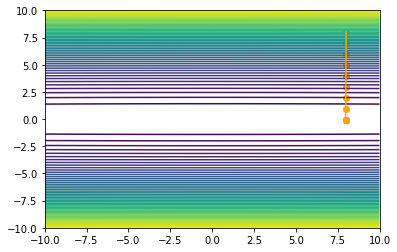

In [15]:
plot_contour_from_function(TrustRegion.minimize, Ellipsoid, lambda_init=1e3, delta_init=100)

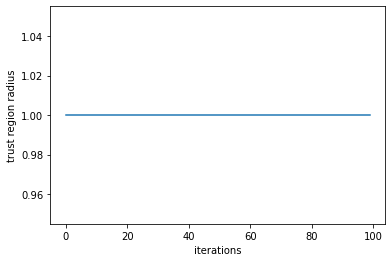

In [9]:
deltas_ellipsoid, ps_ellipsoid, rhos_ellipsoid, xs_ellipsoid = plot_delta_from_function(TrustRegion.minimize, Ellipsoid, delta_init=100)

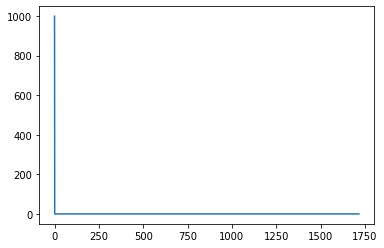

In [8]:
norms_ellipsoid = []
for p in ps_ellipsoid:
    norms_ellipsoid.append(np.linalg.norm(p[0]))
plt.plot((np.append(np.array([1e3]), np.array(deltas_ellipsoid)[:-1]) - np.array(norms_ellipsoid)))

In [12]:
plt.plot(deltas_ellipsoid[0:5])

NameError: name 'deltas_ellipsoid' is not defined

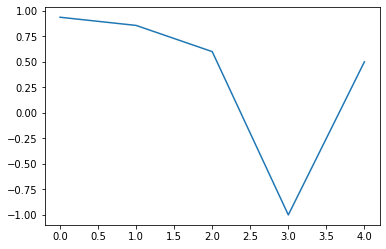

In [10]:
plt.plot(rhos_ellipsoid[0:5])

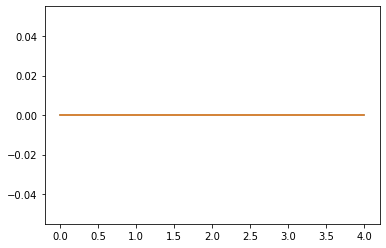

In [10]:
def m(p, x):
    return Ellipsoid.f(x) + np.array(Ellipsoid.gradient(x)).T @ p + 0.5 * p.T @ Ellipsoid.hessian(x) @ p
plt.plot([m(np.zeros(len(x)), x) - m(p, x) for p, x in zip([p[0] for p in ps_ellipsoid], xs_ellipsoid)][0:5])
plt.plot([Ellipsoid.f(x) - Ellipsoid.f(x + p) for p, x in zip([p[0] for p in ps_ellipsoid], xs_ellipsoid)][0:5])
#plt.plot(rhos_ellipsoid[0:5])
#plt.plot(deltas_ellipsoid[0:5])

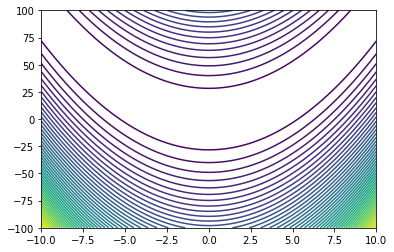

In [11]:
plot_contour(Rosenbrock.f, xs=10, ys=100)

-----
x:  [8, 8]
f(x):  313649
f_grad(x):  [179214 -11200]
f_hess(x): [[73602 -3200]
 [-3200   200]]
delta for next iter 2
rho 1.021617947260826
p (array([-0.99659519,  0.0824502 ]), 105963.74001293206)
p_norm 1.0
m 170936.1957268939
-----
x:  [7.00340481 8.0824502 ]
f(x):  167851.0378506733
f_grad(x):  [114770.43901314  -8193.04575799]
f_hess(x): [[55626.23470552 -2801.36192555]
 [-2801.36192555   200.        ]]
delta for next iter 4
rho 1.133882199327499
p (array([-1.80419974,  0.86305464]), 7400.658219623339)
p_norm 2.0
m 48683.24589219903
-----
x:  [5.19920508 8.94550484]
f(x):  32728.799815796643
f_grad(x):  [37622.00303337 -3617.24571974]
f_hess(x): [[28861.8781874  -2079.68203088]
 [-2079.68203088   200.        ]]
delta for next iter 8
rho 1.172356180437106
p (array([-1.21814411,  3.81000327]), 783.5325334669666)
p_norm 4.0
m 5635.464676392272
-----
x:  [ 3.98106097 12.75550811]
f(x):  965.7609164621056
f_grad(x):  [4931.86948807 -618.66766263]
f_hess(x): [[13918.41246164 -1592.

AssertionError: The norm of p is larger than delta

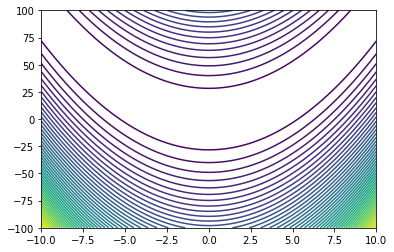

In [13]:
plot_contour_from_function(TrustRegion.minimize, Rosenbrock, xs=10, ys=100, debug=True, max_iterations=17, lambda_init=0)

AssertionError: First eigenvector/value pair was not valid (Q = [[ 1.00000000e+00 -4.87306876e-07]
 [ 0.00000000e+00  1.00000000e+00]])

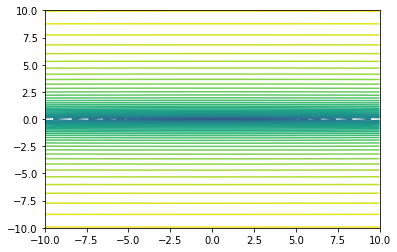

In [9]:
plot_contour_from_function(TrustRegion.minimize, LogEllipsoid)

[-0.7160463 -0.7160463] 10.079592929404981
1.0491641351861072
[-0.7102881 -0.7102881] 8.776833898085934
1.0540381759049218
[-0.70713766 -0.70713766] 7.345879446106926
1.0602830243627923
[-0.70897935 -0.70897935] 5.906884684804092
1.0687479163547808
[-0.7125057 -0.7125057] 4.6708438908357985
1.0801636859588093
[-0.71325869 -0.71325869] 3.706924386878459
1.095585308829192
[-0.70876322 -0.70876322] 3.045875944532166
1.1172505576699427
[-0.71133399 -0.71133399] 2.496360133128248
1.1538824589216943
[-0.71203097 -0.71203097] 1.4485921432667916
1.222586870509846
[-0.70718936 -0.70718936] 0.24190618247440523
1.3962174388402533
[2.96122374e-76 2.96122374e-76] -6.0270128007595325e+75
nan
[2.96122374e-76 2.96122374e-76] -6.0270128007595325e+75
nan
[2.96122374e-76 2.96122374e-76] -6.0270128007595325e+75
nan
[2.96122374e-76 2.96122374e-76] -6.0270128007595325e+75
nan
[2.96122374e-76 2.96122374e-76] -6.0270128007595325e+75
nan
[2.96122374e-76 2.96122374e-76] -6.0270128007595325e+75
nan
[2.96122374e-

[2.96122374e-76 2.96122374e-76] -6.0270128007595325e+75
nan
[2.96122374e-76 2.96122374e-76] -6.0270128007595325e+75
nan
[2.96122374e-76 2.96122374e-76] -6.0270128007595325e+75
nan
[2.96122374e-76 2.96122374e-76] -6.0270128007595325e+75
nan
[2.96122374e-76 2.96122374e-76] -6.0270128007595325e+75
nan
[2.96122374e-76 2.96122374e-76] -6.0270128007595325e+75
nan
[2.96122374e-76 2.96122374e-76] -6.0270128007595325e+75
nan
[2.96122374e-76 2.96122374e-76] -6.0270128007595325e+75
nan
[2.96122374e-76 2.96122374e-76] -6.0270128007595325e+75
nan
[2.96122374e-76 2.96122374e-76] -6.0270128007595325e+75
nan
[2.96122374e-76 2.96122374e-76] -6.0270128007595325e+75
nan
[2.96122374e-76 2.96122374e-76] -6.0270128007595325e+75
nan
[2.96122374e-76 2.96122374e-76] -6.0270128007595325e+75
nan
[2.96122374e-76 2.96122374e-76] -6.0270128007595325e+75
nan
[2.96122374e-76 2.96122374e-76] -6.0270128007595325e+75
nan
[2.96122374e-76 2.96122374e-76] -6.0270128007595325e+75
nan
[2.96122374e-76 2.96122374e-76] -6.02701

[2.96122374e-76 2.96122374e-76] -6.0270128007595325e+75
nan
[2.96122374e-76 2.96122374e-76] -6.0270128007595325e+75
nan
[2.96122374e-76 2.96122374e-76] -6.0270128007595325e+75
nan
[2.96122374e-76 2.96122374e-76] -6.0270128007595325e+75
nan
[2.96122374e-76 2.96122374e-76] -6.0270128007595325e+75
nan
[2.96122374e-76 2.96122374e-76] -6.0270128007595325e+75
nan
[2.96122374e-76 2.96122374e-76] -6.0270128007595325e+75
nan
[2.96122374e-76 2.96122374e-76] -6.0270128007595325e+75
nan
[2.96122374e-76 2.96122374e-76] -6.0270128007595325e+75
nan
[2.96122374e-76 2.96122374e-76] -6.0270128007595325e+75
nan
[2.96122374e-76 2.96122374e-76] -6.0270128007595325e+75
nan
[2.96122374e-76 2.96122374e-76] -6.0270128007595325e+75
nan
[2.96122374e-76 2.96122374e-76] -6.0270128007595325e+75
nan
[2.96122374e-76 2.96122374e-76] -6.0270128007595325e+75
nan
[2.96122374e-76 2.96122374e-76] -6.0270128007595325e+75
nan
[2.96122374e-76 2.96122374e-76] -6.0270128007595325e+75
nan
[2.96122374e-76 2.96122374e-76] -6.02701

[2.96122374e-76 2.96122374e-76] -6.0270128007595325e+75
nan
[2.96122374e-76 2.96122374e-76] -6.0270128007595325e+75
nan
[2.96122374e-76 2.96122374e-76] -6.0270128007595325e+75
nan
[2.96122374e-76 2.96122374e-76] -6.0270128007595325e+75
nan
[2.96122374e-76 2.96122374e-76] -6.0270128007595325e+75
nan
[2.96122374e-76 2.96122374e-76] -6.0270128007595325e+75
nan
[2.96122374e-76 2.96122374e-76] -6.0270128007595325e+75
nan
[2.96122374e-76 2.96122374e-76] -6.0270128007595325e+75
nan
[2.96122374e-76 2.96122374e-76] -6.0270128007595325e+75
nan
[2.96122374e-76 2.96122374e-76] -6.0270128007595325e+75
nan
[2.96122374e-76 2.96122374e-76] -6.0270128007595325e+75
nan
[2.96122374e-76 2.96122374e-76] -6.0270128007595325e+75
nan
[2.96122374e-76 2.96122374e-76] -6.0270128007595325e+75
nan
[2.96122374e-76 2.96122374e-76] -6.0270128007595325e+75
nan
[2.96122374e-76 2.96122374e-76] -6.0270128007595325e+75
nan
[2.96122374e-76 2.96122374e-76] -6.0270128007595325e+75
nan
[2.96122374e-76 2.96122374e-76] -6.02701

[2.96122374e-76 2.96122374e-76] -6.0270128007595325e+75
nan
[2.96122374e-76 2.96122374e-76] -6.0270128007595325e+75
nan
[2.96122374e-76 2.96122374e-76] -6.0270128007595325e+75
nan
[2.96122374e-76 2.96122374e-76] -6.0270128007595325e+75
nan
[2.96122374e-76 2.96122374e-76] -6.0270128007595325e+75
nan
[2.96122374e-76 2.96122374e-76] -6.0270128007595325e+75
nan
[2.96122374e-76 2.96122374e-76] -6.0270128007595325e+75
nan
[2.96122374e-76 2.96122374e-76] -6.0270128007595325e+75
nan
[2.96122374e-76 2.96122374e-76] -6.0270128007595325e+75
nan
[2.96122374e-76 2.96122374e-76] -6.0270128007595325e+75
nan
[2.96122374e-76 2.96122374e-76] -6.0270128007595325e+75
nan
[2.96122374e-76 2.96122374e-76] -6.0270128007595325e+75
nan
[2.96122374e-76 2.96122374e-76] -6.0270128007595325e+75
nan
[2.96122374e-76 2.96122374e-76] -6.0270128007595325e+75
nan
[2.96122374e-76 2.96122374e-76] -6.0270128007595325e+75
nan
[2.96122374e-76 2.96122374e-76] -6.0270128007595325e+75
nan
[2.96122374e-76 2.96122374e-76] -6.02701

[2.96122374e-76 2.96122374e-76] -6.0270128007595325e+75
nan
[2.96122374e-76 2.96122374e-76] -6.0270128007595325e+75
nan
[2.96122374e-76 2.96122374e-76] -6.0270128007595325e+75
nan
[2.96122374e-76 2.96122374e-76] -6.0270128007595325e+75
nan
[2.96122374e-76 2.96122374e-76] -6.0270128007595325e+75
nan
[2.96122374e-76 2.96122374e-76] -6.0270128007595325e+75
nan
[2.96122374e-76 2.96122374e-76] -6.0270128007595325e+75
nan
[2.96122374e-76 2.96122374e-76] -6.0270128007595325e+75
nan
[2.96122374e-76 2.96122374e-76] -6.0270128007595325e+75
nan
[2.96122374e-76 2.96122374e-76] -6.0270128007595325e+75
nan
[2.96122374e-76 2.96122374e-76] -6.0270128007595325e+75
nan
[2.96122374e-76 2.96122374e-76] -6.0270128007595325e+75
nan
[2.96122374e-76 2.96122374e-76] -6.0270128007595325e+75
nan
[2.96122374e-76 2.96122374e-76] -6.0270128007595325e+75
nan
[2.96122374e-76 2.96122374e-76] -6.0270128007595325e+75
nan
[2.96122374e-76 2.96122374e-76] -6.0270128007595325e+75
nan
[2.96122374e-76 2.96122374e-76] -6.02701

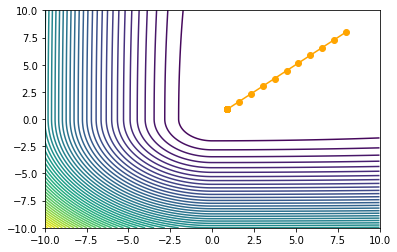

In [11]:
plot_contour_from_function(TrustRegion.minimize, AttractiveSector)

[-0.01248014 -0.99998198] 646.4321692201246
1.0186268362028073
[-0.02032045 -0.99989195] 386.4627552059531
1.025032659201513
[-0.03678111 -1.00094298] 200.8271196836749
1.0355367649616045
[-0.07895118 -1.00192212] 84.05621357179196
1.0543617732229116
[-0.22125544 -0.97992151] 28.082765015202035
1.0873342309654068
[-0.5718123  -0.82039431] 12.395682059768628
1.1005368047982171
[-0.83078159 -0.58173413] 8.353171577415562
1.0623465872931064
[-0.92173012 -0.39364387] 6.024403692992935
1.024937598812481
[-0.96570122 -0.27110292] 4.223267611236503
1.0086476282553811
[-0.98982301 -0.19503063] 3.0060446125781293
1.0033131421678678
[-0.98966426 -0.14841751] 2.3078000396707337
1.0016105738132939
[-1.00478448 -0.12564573] 1.540813812121336
1.001198078916052
[0.97916771 0.22432703] -2.3046234420005605
1.006413210990243
[-0.99925988 -0.16252232] 1.526517020773809
1.0029912915511694
[ 2.06506589 -2.59804246] -1.6009110952422922
1.371739462810736
[-0.80204439  0.60728535] 2.868088319835776
1.10304084

/home/rasmuslovstad/Programs/assignments/num-opt/optimizers/trust_region/__init__.py:22: RuntimeWarning: invalid value encountered in double_scalars
  return (f(x) - f(x+p))/(m(np.zeros(len(x)), x) - m(p, x))


 -1.4154283269270504e+71
nan
[ 1.02444223e-71 -1.05937108e-71] -1.4154283269270504e+71
nan
[ 1.02444223e-71 -1.05937108e-71] -1.4154283269270504e+71
nan
[ 1.02444223e-71 -1.05937108e-71] -1.4154283269270504e+71
nan
[ 1.02444223e-71 -1.05937108e-71] -1.4154283269270504e+71
nan
[ 1.02444223e-71 -1.05937108e-71] -1.4154283269270504e+71
nan
[ 1.02444223e-71 -1.05937108e-71] -1.4154283269270504e+71
nan
[ 1.02444223e-71 -1.05937108e-71] -1.4154283269270504e+71
nan
[ 1.02444223e-71 -1.05937108e-71] -1.4154283269270504e+71
nan
[ 1.02444223e-71 -1.05937108e-71] -1.4154283269270504e+71
nan
[ 1.02444223e-71 -1.05937108e-71] -1.4154283269270504e+71
nan
[ 1.02444223e-71 -1.05937108e-71] -1.4154283269270504e+71
nan
[ 1.02444223e-71 -1.05937108e-71] -1.4154283269270504e+71
nan
[ 1.02444223e-71 -1.05937108e-71] -1.4154283269270504e+71
nan
[ 1.02444223e-71 -1.05937108e-71] -1.4154283269270504e+71
nan
[ 1.02444223e-71 -1.05937108e-71] -1.4154283269270504e+71
nan
[ 1.02444223e-71 -1.05937108e-71] -1.4154

[ 1.02444223e-71 -1.05937108e-71] -1.4154283269270504e+71
nan
[ 1.02444223e-71 -1.05937108e-71] -1.4154283269270504e+71
nan
[ 1.02444223e-71 -1.05937108e-71] -1.4154283269270504e+71
nan
[ 1.02444223e-71 -1.05937108e-71] -1.4154283269270504e+71
nan
[ 1.02444223e-71 -1.05937108e-71] -1.4154283269270504e+71
nan
[ 1.02444223e-71 -1.05937108e-71] -1.4154283269270504e+71
nan
[ 1.02444223e-71 -1.05937108e-71] -1.4154283269270504e+71
nan
[ 1.02444223e-71 -1.05937108e-71] -1.4154283269270504e+71
nan
[ 1.02444223e-71 -1.05937108e-71] -1.4154283269270504e+71
nan
[ 1.02444223e-71 -1.05937108e-71] -1.4154283269270504e+71
nan
[ 1.02444223e-71 -1.05937108e-71] -1.4154283269270504e+71
nan
[ 1.02444223e-71 -1.05937108e-71] -1.4154283269270504e+71
nan
[ 1.02444223e-71 -1.05937108e-71] -1.4154283269270504e+71
nan
[ 1.02444223e-71 -1.05937108e-71] -1.4154283269270504e+71
nan
[ 1.02444223e-71 -1.05937108e-71] -1.4154283269270504e+71
nan
[ 1.02444223e-71 -1.05937108e-71] -1.4154283269270504e+71
nan
[ 1.0244

[ 1.02444223e-71 -1.05937108e-71] -1.4154283269270504e+71
nan
[ 1.02444223e-71 -1.05937108e-71] -1.4154283269270504e+71
nan
[ 1.02444223e-71 -1.05937108e-71] -1.4154283269270504e+71
nan
[ 1.02444223e-71 -1.05937108e-71] -1.4154283269270504e+71
nan
[ 1.02444223e-71 -1.05937108e-71] -1.4154283269270504e+71
nan
[ 1.02444223e-71 -1.05937108e-71] -1.4154283269270504e+71
nan
[ 1.02444223e-71 -1.05937108e-71] -1.4154283269270504e+71
nan
[ 1.02444223e-71 -1.05937108e-71] -1.4154283269270504e+71
nan
[ 1.02444223e-71 -1.05937108e-71] -1.4154283269270504e+71
nan
[ 1.02444223e-71 -1.05937108e-71] -1.4154283269270504e+71
nan
[ 1.02444223e-71 -1.05937108e-71] -1.4154283269270504e+71
nan
[ 1.02444223e-71 -1.05937108e-71] -1.4154283269270504e+71
nan
[ 1.02444223e-71 -1.05937108e-71] -1.4154283269270504e+71
nan
[ 1.02444223e-71 -1.05937108e-71] -1.4154283269270504e+71
nan
[ 1.02444223e-71 -1.05937108e-71] -1.4154283269270504e+71
nan
[ 1.02444223e-71 -1.05937108e-71] -1.4154283269270504e+71
nan
[ 1.0244

[ 1.02444223e-71 -1.05937108e-71] -1.4154283269270504e+71
nan
[ 1.02444223e-71 -1.05937108e-71] -1.4154283269270504e+71
nan
[ 1.02444223e-71 -1.05937108e-71] -1.4154283269270504e+71
nan
[ 1.02444223e-71 -1.05937108e-71] -1.4154283269270504e+71
nan
[ 1.02444223e-71 -1.05937108e-71] -1.4154283269270504e+71
nan
[ 1.02444223e-71 -1.05937108e-71] -1.4154283269270504e+71
nan
[ 1.02444223e-71 -1.05937108e-71] -1.4154283269270504e+71
nan
[ 1.02444223e-71 -1.05937108e-71] -1.4154283269270504e+71
nan
[ 1.02444223e-71 -1.05937108e-71] -1.4154283269270504e+71
nan
[ 1.02444223e-71 -1.05937108e-71] -1.4154283269270504e+71
nan
[ 1.02444223e-71 -1.05937108e-71] -1.4154283269270504e+71
nan
[ 1.02444223e-71 -1.05937108e-71] -1.4154283269270504e+71
nan
[ 1.02444223e-71 -1.05937108e-71] -1.4154283269270504e+71
nan
[ 1.02444223e-71 -1.05937108e-71] -1.4154283269270504e+71
nan
[ 1.02444223e-71 -1.05937108e-71] -1.4154283269270504e+71
nan
[ 1.02444223e-71 -1.05937108e-71] -1.4154283269270504e+71
nan
[ 1.0244

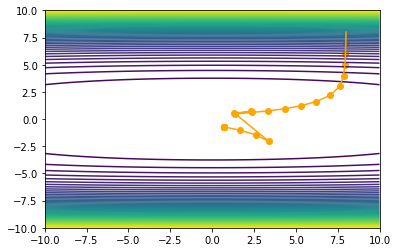

In [10]:
plot_contour_from_function(TrustRegion.minimize, SumOfDifferentPowers, debug=False)

In [ ]:
bb = np.array([[-7278.9319585, -1191.09660256],
 [-1191.09660256, 200.        ]])
np.linalg.eigvals(bb)
np.linalg.eigvals(bb + np.diag([7464.044546002779+0.0001, 7464.044546002779+0.0001]))

In [12]:
g = np.array([-103190.49621188, 9893.02657183])
B = np.array([[ 1979.10981335,-2086.29638149],
 [-2086.29638149,200.        ]])
lam = 0
delta = 64.0
smallest_eigenval = np.min(np.linalg.eigvals(B))
for l in range(100):
    while lam <= - smallest_eigenval:
        print("i")
        lam = lam - (lam + smallest_eigenval - 0.0001)
    R = np.linalg.cholesky(B + np.diag(np.array([lam for _ in g])))
    p = np.linalg.solve(R.T @ R, -g)
    q = np.linalg.solve(R.T, p)
    lam = lam + (np.linalg.norm(p)/np.linalg.norm(q))**2 * \
        ((np.linalg.norm(p) - delta) / delta)
    #print(p)
p
#p = np.linalg.solve(R.T, -g)

i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i


array([23.83412945, 13.18966287])

In [9]:
np.linalg.norm(np.array([-1/np.sqrt(2), -1/np.sqrt(2)]))

0.9999999999999999

In [10]:
1+4*(-99/100)

-2.96